In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
total_cases_clean=pd.read_csv('~/Downloads/country_cases.csv',header=0)

In [3]:
total_cases_clean["Country"] = total_cases_clean["Country"].str.replace(',', '')

In [4]:
genomes_sequenced=pd.read_csv('value_counts.csv',header=0,index_col=0)

In [5]:
genomes_sequenced["index"] = genomes_sequenced["index"].str.replace(',', '')

In [6]:
population=pd.read_csv('../csv/country_population_new.csv',header=0)

In [7]:
population['Population'] = population['Population'].str.replace(',', '')

In [8]:
continent=pd.read_csv("../csv/country_continent.csv",header=0)

In [9]:
total_cases_clean.rename(columns={'Last': 'Total_Cases'}, inplace=True)

In [10]:
genomes_sequenced.rename(columns={'index': 'Country', 'Country': 'sequenced'}, inplace=True)

In [11]:
genomes_sequenced["Country"] = genomes_sequenced.Country.str.replace(' ', '')

In [12]:
df_merged=pd.merge(total_cases_clean, genomes_sequenced, on="Country")

In [13]:
df_merged1=pd.merge(df_merged, population, on="Country")

In [14]:
df_merged2=pd.merge(df_merged1, continent, on="Country")

In [15]:
df_merged2.dtypes

Country        object
Total_Cases     int64
sequenced       int64
Population     object
Continent      object
dtype: object

In [16]:
df_merged2["Total_Cases"] = pd.to_numeric(df_merged2["Total_Cases"])
df_merged2["Population"] = pd.to_numeric(df_merged2["Population"])

In [17]:
df_merged2['cases_per_pop']=df_merged2["Total_Cases"]/df_merged2["Population"]
df_merged2['sequenced_per_cases'] = df_merged2['sequenced']/df_merged2['Total_Cases']

In [18]:
df_merged2['sequenced_per_mnpop'] = df_merged2['sequenced']/df_merged2['Population']*1000000

In [19]:
df_merged2['cases_per_mnpop']=df_merged2["Total_Cases"]/df_merged2["Population"]*1000000

In [20]:
# df_merged2

In [21]:
df_merged2.to_csv('df_merged2.csv')

In [22]:
df_Asia = df_merged2[df_merged2["Continent"] == "Asia"]
df_Oceania = df_merged2[df_merged2["Continent"] == "Oceania"]
df_NA = df_merged2[df_merged2["Continent"] == "North America"]
df_Europe = df_merged2[df_merged2["Continent"] == "Europe"]
df_Africa = df_merged2[df_merged2["Continent"] == "Africa"]
df_SA = df_merged2[df_merged2["Continent"] == "South America"]

In [23]:
c1=1/min(df_merged2["cases_per_pop"])
c=1
# (df_Asia["cases_per_pop"]*c1)

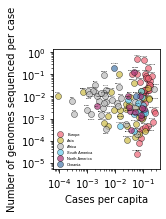

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=4.5) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)

alpha=0.7
l=0.5
plt.scatter( df_Europe['cases_per_pop'],df_Europe['sequenced_per_cases'],color='#EE6677',lw=l,alpha=alpha,edgecolors='black')
plt.scatter( df_Asia['cases_per_pop'],df_Asia['sequenced_per_cases'],color='#CCBB44',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_Africa['cases_per_pop'],df_Africa['sequenced_per_cases'],color='#BBBBBB',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_SA['cases_per_pop'], df_SA['sequenced_per_cases'],color='#66CCEE',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_NA['cases_per_pop'],df_NA['sequenced_per_cases'],color='#AA3377',lw=l,alpha=alpha,edgecolors='black')
plt.scatter( df_Oceania['cases_per_pop'],df_Oceania['sequenced_per_cases'],color='#4477AA',lw=l,alpha=alpha,edgecolors='black')
up = (1,1.5)
down = (1,0.6)
right = (1.7,1)
left = (0.6,1)
center = (1,1)
ctr_d_xy = {'Denmark':up, 'Iceland':up, 'Luxembourg':(1.2,1.45), 'United Kingdom':up,
           'Norway':(1,1.45), 'USA':(1.5,1), 'Slovenia':(1,1.4), 
           'Canada':(1.1,1.65),'Australia':up,
           'Italy':center,  'Gambia':up,
           'Zimbabwe':left, 'Kenya':up, 'Mali':left, 'Uganda':up, 'Ethiopia':up, 'Venezuela':up,
           'Sierra Leone': (0.8,1.5), 'Senegal':up,"Singapore":up,"Finland":up,
           'Madagascar':up,'Armenia':(1,1.4),"Serbia":(1.4,1),'Georgia':(1,1.4),
           'Rwanda':(1,1.4), 'Pakistan':up, 'Algeria':down, 'Albania':up, 'Nepal':(1,1.4), 'China':up,"Liberia":down,
           'Iran':(1,1), 'Taiwan':up, 'Bulgaria':(0.55,1.1), 'India':center,
           'Kazakhstan':(1,1.4), 'Guinea':left, "Benin":up,"Niger":up,"Chad":up,"Sudan":up,
            "Somalia":down,"Afghanistan":(1,1.4),"Djibouti":up,"Azerbaijan":up,"Kyrgyzstan":up,"Haiti":(1,1),
           'South Africa':(0.6,1.4), 'Japan':down,"Brunei":up, "Bahrain":right, 'Peru':center,
           'New Zealand':up, 'Vietnam': (1,1), 'Cambodia': up, 'Papua New Guinea': up,
           'Saint Kitts and Nevis': up, 'Mongolia': right, 'Cameron': down, 
           'Montenegro':right, 'Gabon':up, 'Philipines':left, 'Egipt': down,
            'Israel':(1,1), 'Estonia':right, 'Dominican Republic': (1,0.55),
            'Bolivia':left, 'Belarus':(1,0.5),"Guatemala":center,"Guyana":center,
           'Equatorial Guinea':(0.8,1.5), 'Mexico':center, 'Grece':center, 
           "Germany":(1,1.4), 'Moroco': center,
           'Sweden':(1,1.4),"Montenegro":up}
for i, txt in enumerate(df_merged2.Country):
    dx = 1
    dy = 1
    if txt in ctr_d_xy: 
        dx, dy = (1,1) if ctr_d_xy[txt] is None else ctr_d_xy[txt]
        plt.annotate(txt,(df_merged2['cases_per_pop'][i]*dx,df_merged2['sequenced_per_cases'][i]*dy), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

plt.yscale('log')
plt.xscale('log')
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('Number of genomes sequenced per case')
plt.xlabel('Cases per capita')

plt.tight_layout()



labels=["Europe","Asia","Africa","South America","North America","Oceania"]
lgnd=ax.legend(labels,loc="lower left", prop={'size': 3.9},edgecolor="white",fontsize=4.5)

plt.ylim(5e-6,1.4)
# #plt.ylim(1e-6,1.4)
# plt.xlim(1.5e-5,0.2)
#plt.xlim(-0.01,0.15)

plt.savefig('gdp_sequenced_case_log_new.png', dpi=600, bbox_inches = "tight")
# plt.savefig('gdp_sequenced_case_log.pdf', dpi=300, bbox_inches = "tight")
# plt.show()

In [25]:
# import math
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.rcParams["font.family"] = "Helvetica"
# plt.rc('ytick', labelsize=4.5) 
# plt.rc('xtick', labelsize=4.5) 
# plt.rc('axes', titlesize=5.5)
# plt.rc('axes', labelsize=5.5)
# # plt.grid(linewidth=0.3,color="#DDDDDD")
# alpha=0.7
# c1=1/min(df_merged2["cases_per_pop"])
# c=1
# plt.scatter( df_Asia['cases_per_pop'],df_Asia['sequenced_per_cases'],color='#CCBB44',lw=0.5,alpha=alpha,edgecolors='black')
# plt.scatter( df_Oceania['cases_per_pop'],df_Oceania['sequenced_per_cases'],color='#4477AA',lw=0.5,alpha=alpha,edgecolors='black')
# plt.scatter(df_NA['cases_per_pop'],df_NA['sequenced_per_cases'],lw=0.5,alpha=alpha,edgecolors='black')
# plt.scatter(df_SA['cases_per_pop'], df_SA['sequenced_per_cases'],color='#66CCEE',lw=0.5,alpha=alpha,edgecolors='black')
# plt.scatter( df_Europe['cases_per_pop'],df_Europe['sequenced_per_cases'],color='#EE6677',lw=0.5,alpha=alpha,edgecolors='black')
# plt.scatter(df_Africa['cases_per_pop'],df_Africa['sequenced_per_cases'],color='#BBBBBB',lw=0.5,alpha=alpha,edgecolors='black')
# for i, txt in enumerate(df_merged2.Country):
#     plt.annotate(txt,(df_merged2.cases_per_pop[i],df_merged2.sequenced_per_cases[i]), textcoords="offset points",xytext=(0,3.5),ha='center',fontsize=2)


# # for i, txt in enumerate(labels):
# #     plt.annotate(txt,(df_merged.Count[i], df_merged.Total_Cases[i]), textcoords="offset points",xytext=(0,2),ha='center')

# plt.yscale('log')
# plt.xscale('log')
# plt.gcf().set_size_inches(2.416, 2.458)

# plt.ylabel('Number of genomes sequenced per case')
# plt.xlabel('Cases per capita')

# plt.tight_layout()



# labels=["Asia","Oceania","North America","South America","Europe","Africa"]
# lgnd=ax.legend(labels,loc="lower left", prop={'size': 4.5},edgecolor="white",fontsize=4.5,framealpha=0)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([20.0])
    

# labels1 = ['0.0002','0.002', '0.02']
# #lgnd1 = ax.legend(labels1,loc="best", prop={'size': 4},edgecolor="white",title="Cases per population",fontsize=4)
# # plt.setp(lgnd1.get_title(),fontsize=4.5)
# # lgnd1.legendHandles[0]._sizes = [np.sqrt(c1*0.0002)]
# # lgnd1.legendHandles[1]._sizes = [np.sqrt(c1*0.002)]
# # lgnd1.legendHandles[2]._sizes = [np.sqrt(c1*0.02)]
# # lgnd1.legendHandles[3]._sizes = [np.sqrt(1000)]
# # lgnd1.legendHandles[4]._sizes = [np.sqrt(10000)]
# # lgnd1.legendHandles[0].set_color('#CCBB44')
# # lgnd1.legendHandles[1].set_color('#CCBB44')
# # lgnd1.legendHandles[2].set_color('#CCBB44')
# # lgnd1.legendHandles[3].set_color('#CCBB44')
# ax.add_artist(lgnd)
    
# plt.yscale('log')
# plt.xscale('log')

# # leg = plt.legend(labels1,loc="lower right", prop={'size': 4.5},edgecolor="white")

# # plt.ylim(1,20000000)
# # plt.xlim(1000,80000000)
# # plt.grid(linewidth=0.3,color="#DDDDDD")
# plt.savefig('Fig1b_scatter_nolabel_nogridline.png', dpi=500, bbox_inches = "tight")
# # plt.savefig('Fig1b_scatter_nolabel_nogridline.pdf', dpi=300, bbox_inches = "tight")
# # plt.show()

# Figure 1b: without variable size

In [26]:
GDP=pd.read_csv('../csv/country_GDP.csv',header=0)

In [27]:
df_merged=pd.merge(GDP, genomes_sequenced, on="Country")

In [28]:
df_merged1=pd.merge(df_merged, total_cases_clean, on="Country")

In [29]:
df_merged11=pd.merge(df_merged1, continent, on="Country")

In [30]:
df_merged2=pd.merge(df_merged11, population, on="Country")

In [31]:
df_merged2["Total_Cases"] = pd.to_numeric(df_merged2["Total_Cases"])
df_merged2["Population"] = pd.to_numeric(df_merged2["Population"])


In [32]:
# df_merged2.drop('index_x', axis=1, inplace=True)
# df_merged2.drop('index_y', axis=1, inplace=True)
df_merged2['cases_per_pop'] = df_merged2['Total_Cases']/df_merged2['Population']
df_merged2['sequenced_per_pop'] = df_merged2['sequenced']/df_merged2['Population']
df_merged2['sequenced_per_mn'] = df_merged2['sequenced']/df_merged2['Population']*1000000
# df_merged2['sequenced_per_case'] = df_merged2['sequenced']/df_merged2['Total_Cases']
df_merged2['GDP_per_pop'] = df_merged2['GDP']/df_merged2['Population']
df_merged2['sequenced_per_cases'] = df_merged2['sequenced']/df_merged2['Total_Cases']

In [33]:
df_merged2.to_csv('gdp_per_capita.csv')

In [34]:
Income=pd.read_csv('../csv/country_income_new.csv',header=0)

In [35]:
df_merged3=pd.merge(df_merged2, Income, on="Country")

In [36]:
df_merged3.to_csv('income_stats.csv')

In [37]:
df_merged2['sequenced_per_mnpop'] = df_merged2['sequenced']/df_merged2['Population']*1000000

In [38]:
df_Asia = df_merged2[df_merged2["Continent"] == "Asia"]
df_Oceania = df_merged2[df_merged2["Continent"] == "Oceania"]
df_NA = df_merged2[df_merged2["Continent"] == "North America"]
df_Europe = df_merged2[df_merged2["Continent"] == "Europe"]
df_Africa = df_merged2[df_merged2["Continent"] == "Africa"]
df_SA = df_merged2[df_merged2["Continent"] == "South America"]

In [39]:
(min(df_merged2["sequenced_per_pop"]))

5.3727693008081e-07

In [40]:
min(df_merged2["sequenced_per_pop"])

5.3727693008081e-07

In [41]:
min(df_merged2["GDP_per_pop"])

303.592446832277

In [42]:
max(df_merged2["GDP_per_pop"])

108384.63251775924

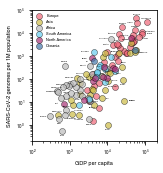

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=4.5) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)

alpha=0.7
l=0.5
plt.scatter( df_Europe['GDP_per_pop'],df_Europe['sequenced_per_mn'],color='#EE6677',lw=l,alpha=alpha,edgecolors='black')
plt.scatter( df_Asia['GDP_per_pop'],df_Asia['sequenced_per_mn'],color='#CCBB44',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_Africa['GDP_per_pop'],df_Africa['sequenced_per_mn'],color='#BBBBBB',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_SA['GDP_per_pop'], df_SA['sequenced_per_mn'],color='#66CCEE',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_NA['GDP_per_pop'],df_NA['sequenced_per_mn'],color='#AA3377',lw=l,alpha=alpha,edgecolors='black')
plt.scatter( df_Oceania['GDP_per_pop'],df_Oceania['sequenced_per_mn'],color='#4477AA',lw=l,alpha=alpha,edgecolors='black')
up = (1,1.4)
down = (1,0.6)
right = (1.6,1)
left = (0.65,1)
center = (1,1)
ctr_d_xy = {'Denmark':up, 'Iceland':left, 'Luxembourg':up, 'United Kingdom':(0.8,1.6), 'Switzerland':right,"Sweden":up,"Austria":left,
           'Ireland':right, 'Norway':(1.5,0.9), 'USA':(1.4,1), 'Slovenia':up, 'Latvia':up,
           'Canada':(0.72,0.87), 'Singapore':(1.6,0.75),"Belize":left, "Fiji":left,"Dijbouti":left,
            'Gambia':up, 'North Macedonia':up,
           "Cambodia":left, 'Mali':up, 'Uganda':up, 'Ethiopia':up, 'Venezuela':down,
           'Afghanistan':up, 'Sierra Leone': up, 'Mozambique':up,  'Madagascar':left,
           'Rwanda':(0.7,1),  'Algeria':down, 'Albania':down, 'Nepal':(1.5,1), 'China':down,
           'Croatia':left, 'Kuwait':down, 'Taiwan':right, 'Bulgaria':right, 'India':center,
           'Kazakhstan':(1.6,1.3),  'Jordan':(0.7,0.8), 'Suriname':(0.6,1),
           'South Africa':(0.5,1), "Brunei":(1.1,1.5), 'Peru':center,
           'New Zealand':(1.7,0.5),"Niger":down, "Chad":down,"Ethopia":left,"Haiti":left,"Somalia":left,"Kyrgyzstan":down,"Uzbekistan":down
           ,'Moroco': center,"Lenanon":left,"Dijbouti":left,"Uruguay":left,"Oman":right,"Russia":right,"Iran":(1.4,1)
           ,"Belarus":left,"Lithuania":left,"Seychelles":left,"Djibouti":left,"Lebanon":left}
for i, txt in enumerate(df_merged2.Country):
    dx = 1
    dy = 1
    if txt in ctr_d_xy: 
        dx, dy = (1,1.6) if ctr_d_xy[txt] is None else ctr_d_xy[txt]
        plt.annotate(txt,(df_merged2.GDP_per_pop[i]*dx,df_merged2.sequenced_per_mn[i]*dy), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

plt.yscale('log')
plt.xscale('log')
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('SARS-CoV-2 genomes per 1M population')
plt.xlabel('GDP per capita')

plt.tight_layout()



labels=["Europe","Asia","Africa","South America","North America","Oceania"]
lgnd=ax.legend(labels,loc="upper left", prop={'size': 3.9},edgecolor="white",fontsize=4.5)

plt.ylim(0.2,100000)
plt.xlim(100,200000)

plt.savefig('gdp_sequenced_pop.png', dpi=600, bbox_inches = "tight")
# plt.savefig('gdp_sequenced_pop.pdf', dpi=300, bbox_inches = "tight")
plt.show()

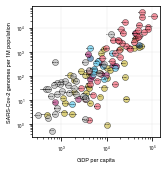

In [44]:
import math
import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.rcParams["font.family"] = "Helvetica"
# plt.rc('ytick', labelsize=4.5) 
# plt.rc('xtick', labelsize=4.5) 
# plt.rc('axes', titlesize=5.5)
# plt.rc('axes', labelsize=5.5)

alpha=0.7

plt.scatter( df_Asia['GDP_per_pop'],df_Asia['sequenced_per_mnpop'],color='#CCBB44',lw=0.5,alpha=alpha, edgecolors='black')
plt.scatter( df_Oceania['GDP_per_pop'],df_Oceania['sequenced_per_mnpop'],color='#4477AA',lw=0.5,alpha=alpha,edgecolors='black')
plt.scatter(df_NA['GDP_per_pop'],df_NA['sequenced_per_mnpop'],color='#AA3377',lw=0.5,alpha=alpha,edgecolors='black')
plt.scatter(df_SA['GDP_per_pop'], df_SA['sequenced_per_mnpop'],color='#66CCEE',lw=0.5,alpha=alpha,edgecolors='black')
plt.scatter( df_Europe['GDP_per_pop'],df_Europe['sequenced_per_mnpop'],color='#EE6677',lw=0.5,alpha=alpha,edgecolors='black')
plt.scatter(df_Africa['GDP_per_pop'],df_Africa['sequenced_per_mnpop'],color='#BBBBBB',lw=0.5,alpha=alpha,edgecolors='black')
for i, txt in enumerate(df_merged2.Country):
    plt.annotate(txt,(df_merged2.GDP_per_pop[i],df_merged2.sequenced_per_mnpop[i]), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

    
plt.yscale('log')
plt.xscale('log')
# plt.gcf().set_size_inches(2.416, 2.458)
plt.gcf().set_size_inches(2.416, 2.458)
plt.ylabel('SARS-Cov-2 genomes per 1M population')
plt.xlabel('GDP per capita')

plt.tight_layout()



labels=["Asia","Oceania","North America","South America","Europe","Africa"]
# lgnd=ax.legend(labels,loc="upper left", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
lgnd=ax.legend(labels,loc="upper left", prop={'size': 4.5},edgecolor="white",fontsize=4.5,framealpha=0)
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
# plt.ylim(0.01,100000)
# plt.xlim(300,200000)

# plt.ylim(0.00000001,0.0025)
# plt.xlim(350,200000)
plt.grid(linewidth=0.3,color="#DDDDDD")
# # plt.tight_layout()
plt.savefig('gdp_sequenced_lab.png', dpi=600, bbox_inches = "tight")
# plt.savefig('gdp_sequenced.pdf', dpi=300, bbox_inches = "tight")
plt.show()

In [45]:
(min(df_merged2["sequenced_per_cases"]))

2.457735147906501e-05

In [46]:
(max(df_merged2["sequenced_per_cases"]))

0.4706558161799904

In [47]:
2.416*300

724.8

# Figure 1e

In [48]:
df_merged2

,Country,GDP_per_min,GDP,sequenced,Total_Cases,Continent,Population,cases_per_pop,sequenced_per_pop,sequenced_per_mn,GDP_per_pop,sequenced_per_cases,sequenced_per_mnpop
0,China,"14,860,775",14860775000000,1365,129678,Asia,1439323776,0.000090,9.483620e-07,0.948362,10324.831180,0.010526,0.948362
1,Japan,"4,910,580",4910580000000,180815,1729777,Asia,126205207,0.013706,1.432706e-03,1432.706338,38909.488101,0.104531,1432.706338
2,Germany,"3,780,553",3780553000000,308516,6809622,Europe,83971144,0.081095,3.674072e-03,3674.071655,45022.049479,0.045306,3674.071655
3,India,"2,592,583",2592583000000,95696,34746838,Asia,1389456823,0.025007,6.887296e-05,68.872957,1865.896771,0.002754,68.872957
4,France,"2,551,451",2551451000000,165992,8625849,Europe,65374481,0.131945,2.539095e-03,2539.094727,39028.241004,0.019244,2539.094727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Gambia,"1,806",1806000000,948,10051,Africa,2463536,0.004080,3.848127e-04,384.812724,733.092595,0.094319,384.812724
123,Belize,"1,556",1556000000,321,31246,North America,402637,0.077603,7.972442e-04,797.244168,3864.523131,0.010273,797.244168
124,Seychelles,"1,198",1198000000,543,24128,Africa,98772,0.244280,5.497509e-03,5497.509416,12128.943425,0.022505,5497.509416
125,Grenada,"1,074",1074000000,12,5919,North America,112887,0.052433,1.063010e-04,106.300991,9513.938717,0.002027,106.300991


In [49]:
medians = df_merged2.groupby(["Continent"])["sequenced_per_mn"].median()

In [50]:
medians

Continent
 Asia              11.196417
Africa             29.096084
Asia               83.989045
Europe           2405.321259
North America     124.807588
Oceania          1241.469218
South America     207.336609
Name: sequenced_per_mn, dtype: float64

In [51]:
df_merged2.median().sort_values().index 

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_11233/1080838208.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_merged2.median().sort_values().index


Index(['sequenced_per_pop', 'sequenced_per_cases', 'cases_per_pop',
       'sequenced_per_mn', 'sequenced_per_mnpop', 'sequenced', 'GDP_per_pop',
       'Total_Cases', 'Population', 'GDP'],
      dtype='object')

In [52]:
df_merged2.to_csv("test.csv")

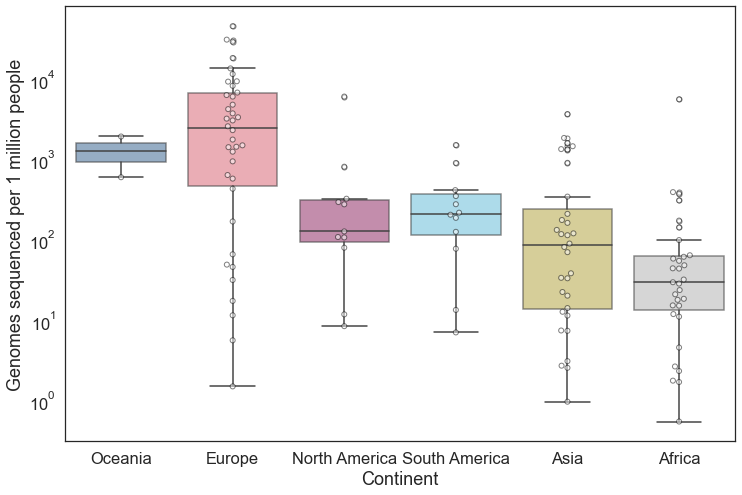

In [53]:
import seaborn as sns
# boxprops=dict(alpha=.3)
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8
sns.set(font_scale = 1.5)
sns.set_style("white")
tips = sns.load_dataset("tips")
flierprops = dict(marker='o', markerfacecolor='white',
                  linestyle='none', markeredgecolor='black',alpha=0.5,markersize=5)
my_pal = {"Oceania":"#4477AA","Europe": "#EE6677", "Africa": "#BBBBBB", "Asia":"#CCBB44","North America":"#AA3377","South America":"#66CCEE"}
ax = sns.boxplot(x="Continent",y="sequenced_per_mn", palette=my_pal, boxprops=dict(alpha=.6),data=df_merged2,flierprops=flierprops,order=["Oceania","Europe","North America","South America","Asia","Africa"])

ax.set_yscale('log')



ax = sns.swarmplot(x="Continent",y="sequenced_per_mn",  data=df_merged2, color="white",size=5,alpha=0.5, edgecolor="black",linewidth=1,marker='o',order=["Oceania","Europe","North America","South America","Asia","Africa"])

ax.set(xlabel='Continent', ylabel='Genomes sequenced per 1 million people')
# ax.set_xlabel('Continent',fontsize=20);
# ax.set_ylabel('Cases per population',fontsize=20);
# figure.savefig('full_figure.png')
ax.figure.savefig('box_continent_seq.png')

In [54]:
df_merged2

,Country,GDP_per_min,GDP,sequenced,Total_Cases,Continent,Population,cases_per_pop,sequenced_per_pop,sequenced_per_mn,GDP_per_pop,sequenced_per_cases,sequenced_per_mnpop
0,China,"14,860,775",14860775000000,1365,129678,Asia,1439323776,0.000090,9.483620e-07,0.948362,10324.831180,0.010526,0.948362
1,Japan,"4,910,580",4910580000000,180815,1729777,Asia,126205207,0.013706,1.432706e-03,1432.706338,38909.488101,0.104531,1432.706338
2,Germany,"3,780,553",3780553000000,308516,6809622,Europe,83971144,0.081095,3.674072e-03,3674.071655,45022.049479,0.045306,3674.071655
3,India,"2,592,583",2592583000000,95696,34746838,Asia,1389456823,0.025007,6.887296e-05,68.872957,1865.896771,0.002754,68.872957
4,France,"2,551,451",2551451000000,165992,8625849,Europe,65374481,0.131945,2.539095e-03,2539.094727,39028.241004,0.019244,2539.094727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Gambia,"1,806",1806000000,948,10051,Africa,2463536,0.004080,3.848127e-04,384.812724,733.092595,0.094319,384.812724
123,Belize,"1,556",1556000000,321,31246,North America,402637,0.077603,7.972442e-04,797.244168,3864.523131,0.010273,797.244168
124,Seychelles,"1,198",1198000000,543,24128,Africa,98772,0.244280,5.497509e-03,5497.509416,12128.943425,0.022505,5497.509416
125,Grenada,"1,074",1074000000,12,5919,North America,112887,0.052433,1.063010e-04,106.300991,9513.938717,0.002027,106.300991


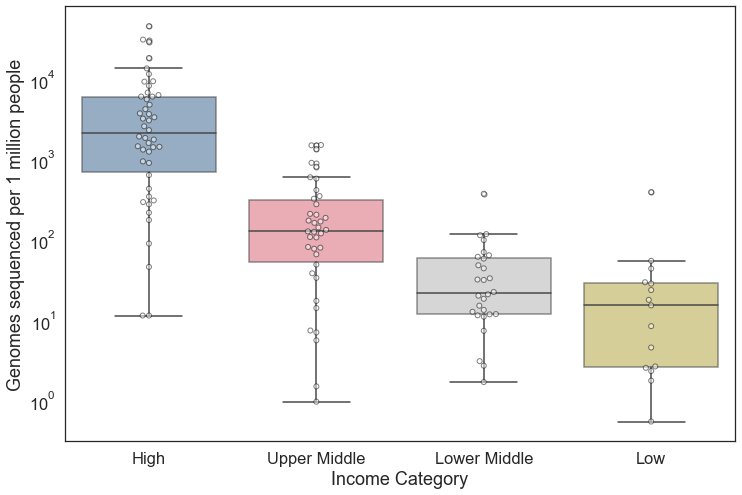

In [55]:
sns.set(font_scale = 1.5)
sns.set_style("white")
flierprops = dict(marker='o', markerfacecolor='white',
                  linestyle='none', markeredgecolor='black',alpha=0.5,markersize=5)
my_pal = {"High":"#4477AA","Upper Middle": "#EE6677", "Lower Middle": "#BBBBBB", "Low":"#CCBB44"}
ax = sns.boxplot(x="Income Category", y="sequenced_per_mn",  data=df_merged3, palette=my_pal,boxprops=dict(alpha=.6),flierprops=flierprops,order=["High","Upper Middle","Lower Middle","Low"])
# ax = sns.violinplot(x="Income Category", y="sequenced_per_pop",  data=df_merged3,scale='count')
ax.set(xlabel='Income Range', ylabel='Genomes sequenced per population')
ax.set_yscale('log')

ax = sns.swarmplot(x="Income Category", y="sequenced_per_mn", data=df_merged3, color="white",size=5,alpha=0.5, edgecolor="black",linewidth=1,marker='o',order=["High","Upper Middle","Lower Middle","Low"])
ax.set(xlabel='Income Category', ylabel='Genomes sequenced per 1 million people')
# figure.savefig('full_figure.png')
ax.figure.savefig('box_income_seq.png')

